## Определение перспективного тарифа для телеком компании

### Описание проекта - основная задача

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### План проекта

[ШАГ 1 Открываем файл с данными и изучаем общую информацию о представленных данных](#step1)  
- Импортировать файлы с исходными данными и посмотреть общую информацию.

[Шаг 2 Подготовка данных](#step2)  
- Привести данные к нужным типам;
- Найти и исправить ошибки в данных;
- Посчитать для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам;
- Посчитать для каждого пользователя оличество отправленных сообщений по месяцам;
- Посчитать для каждого пользователя объем израсходованного интернет-трафика по месяцам;
- Посчитать для каждого пользователя помесячную выручку с каждого пользователя.

[Шаг 3 Анализ данных](#step3)  

- Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

[Шаг 4. Проверка гипотез](#step4)  
- Гипотеза1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- Гипотеза2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

[Шаг 5. Общий вывод](#step5)

- Написать общий вывод по результатам исследования.

### Шаг 1. Открываем файл с данными и изучаем общую информацию о представленных данных <a id="step1"></a>  

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')

data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tarifs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

display('Данные о звонках', data_calls.describe()) # изучение каждого датасета с помощью метода describe
display(data_calls.info()) # проверим типы данных и посмотрим наличие пропущенных значений

# проверяем дубликаты, для остальных датасетов проверяем аналогично 
display('Дубликатов в данных о звонках:', data_calls.duplicated().sum()) 


display(data_calls)
data_calls['duration'] = data_calls['duration'].apply(math.ceil) # округлим значения до большего и приведем к значения к типу int
print('')
display('Данные об интернете', data_internet.describe())
display(data_internet.info())

data_internet['mb_used'] = data_internet['mb_used'].apply(math.ceil)
del data_internet['Unnamed: 0'] # удаление лишнего столбца

display ('Дубликатов в данных об интернете:', data_internet.duplicated().sum())
display(data_internet)
print('')
display('Данные о сообщениях', data_messages.describe())
display(data_messages.info())
display ('Дубликатов в данных о сообщениях:', data_messages.duplicated().sum())
display(data_messages)
print('')
display('Данные о тарифах')
display(data_tarifs.info())
display(data_tarifs)
print('')
display('Данные о пользователях', data_users.describe())
display ('Дубликатов в данных о пользователях:', data_users.duplicated().sum())
display(data_users.info())
display(data_users)

### Вывод

- Удалили ненужный столбец из датафрейма data_internet
- Увидели наличие значений 0 в столбцах data_internet['mb_used'] и data_calls['duration']
- Проверили типы данных для каждого датасета
- Обратили внимание, что во всех датасетах есть общий столбец user_id
- Проверили данные на наличие дубликатов - дубликаты не обнаружены

### Шаг 2. Подготовка данных <a id="step2"></a>  

In [2]:
null_calls = data_calls[data_calls['duration'] == 0]['id'].count()
null_mb = data_internet[data_internet['mb_used'] == 0]['id'].count()
print('Количество нулевых значений в звонках:', null_calls)
print('Процент нулевых значений от общего количества звонков равен {:0.2f}'.format(null_calls/data_calls['duration'].count()*100))
print('Количество нулевых значений в интернет сессиях:', null_mb)
print('Процент нулевых значений от общего количества интернет сессий равен {:0.2f}'.format(null_mb/data_internet['mb_used'].count()*100))
display(data_internet[data_internet['mb_used'] == 0]['user_id'].value_counts()) # проверка на количество нулевых сессий для одного пользователя

Количество нулевых значений в звонках: 39613
Процент нулевых значений от общего количества звонков равен 19.55
Количество нулевых значений в интернет сессиях: 19598
Процент нулевых значений от общего количества интернет сессий равен 13.12
1204    144
1496    141
1429    125
1119    124
1227    121
       ... 
1084      1
1192      1
1201      1
1016      1
1467      1
Name: user_id, Length: 494, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: int64(2),

### Вывод

Процент нулевых значений для звонков большой, поэтому их убирать будет не правильно. Опрделим эти значения, как пропущенные звонки.

Что касается интернет сессий, то здесь не понятно, почему присутствуют нулевые значения, особенно несколько раз для одного пользователя. Классифицируем это, как ошибку и удалим все строки со значениями 0 несмотря на то, что они составляют 13.12% датасета.

In [3]:
def data_calls_month(data):
    data['month'] = data['call_date'].dt.month # добавляем значение месяц в столбец для датасета data_calls

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_calls_month(data_calls)

def data_internet_month(data):
    data['month'] = data['session_date'].dt.month # добавляем значение месяц в столбец для датасета data_internet

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_internet_month(data_internet)

def data_messages_month(data):
    data['month'] = data['message_date'].dt.month # добавляем значение месяц в столбец для датасета data_messages

data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_messages_month(data_messages)
                 

# вычисление количества звонков для каждого пользователя
users_calls = data_users.join(data_calls.set_index('user_id'), how='right', on='user_id')
users_calls_pivot = users_calls.pivot_table(index = ['user_id', 'month'], aggfunc = {'id' : 'count', 'duration' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)
#print(users_calls_pivot.sort_values(by = 'user_id'))

# вычисление количества звонков для каждого пользователя
users_internet = data_users.join(data_internet.set_index('user_id'), how='right', on='user_id')
users_internet_pivot = users_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum') \
                        .reset_index().rename_axis(None, axis=1)
#print(users_internet_pivot.sort_values(by = 'user_id'))

# вычисление количества звонков для каждого пользователя
users_messages = data_users.join(data_messages.set_index('user_id'), how='right', on='user_id')
users_messages_pivot = users_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count') \
                        .reset_index().rename_axis(None, axis=1)
#print(users_messages_pivot.sort_values(by = 'user_id'))

# объединение таблиц в одну общую с инффрмацией по звонкам, сообщениям и интернету
detail_tariff_info = data_users.merge(users_calls_pivot, on = 'user_id', how='left')
detail_tariff_info = detail_tariff_info.merge(users_internet_pivot, on = ['user_id', 'month'], how='left')
detail_tariff_info = detail_tariff_info.merge(users_messages_pivot, on = ['user_id', 'month'], how='left')
display(detail_tariff_info.sort_values(by = 'user_id'))


      user_id  age  churn_date         city first_name  last_name    reg_date  \
0        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
2        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
3        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
4        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
...       ...  ...         ...          ...        ...        ...         ...   
3176     1498   68  2018-10-25  Владикавказ   Всеволод    Акимчин  2018-07-19   
3179     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   
3180     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   
3178     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   
3181     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   

     tariff  month  duratio

### Вывод

Добавили для каждого датасета столбец month и заполнили его числовым значением месяца.
Объединили все датасеты в один общий с информацией по пользователям, звонкам, сообщениям и интернету

In [4]:
# Функция users_expenses_count на основе данных о совершенных звонках, отправленных сообщений и используемых мб интернета
# Считает расходы пользователя на связь за один месяц
def users_expenses_count(row):
    if row['tariff'] == 'ultra':
        min_included = 3000 # характеристики тарифа Ультра
        min_pay = 1
        message_included = 1000
        message_pay = 1
        internet_included = 30
        internet_pay = 150
        month_tariff_pay = 1950
        if row['duration'] > min_included:
            pay_call = (row['duration'] - min_included) * min_pay
        else:
            pay_call = 0
        if row['id_y'] > message_included:
            pay_message = (row['id_y'] - message_included) * message_pay
        else:
            pay_message = 0
        if row['mb_used']/1024 > internet_included:
            pay_internet = math.ceil((row['mb_used']/1024) - internet_included) * internet_pay
        else:
            pay_internet = 0
        month_payment = pay_call + pay_message + pay_internet + month_tariff_pay
    else:
        min_included = 500 # характеристики тарифа Смарт
        min_pay = 3
        message_included = 50
        message_pay = 3
        internet_included = 15
        internet_pay = 200
        month_tariff_pay = 550        
        if row['duration'] > min_included:
            pay_call = (row['duration'] - min_included) * min_pay
        else:
            pay_call = 0
        if row['id_y'] > message_included:
            pay_message = (row['id_y'] - message_included) * message_pay
        else:
            pay_message = 0
        if row['mb_used']/1024 > internet_included:
            pay_internet = math.ceil((row['mb_used']/1024) - internet_included) * internet_pay
        else:
            pay_internet = 0
        month_payment = pay_call + pay_message + pay_internet + month_tariff_pay
    return month_payment

detail_tariff_info['month_payment'] = detail_tariff_info.apply(users_expenses_count, axis = 1)             
display(detail_tariff_info)    


      user_id  age  churn_date         city first_name  last_name    reg_date  \
0        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
2        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
3        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
4        1000   52         NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
...       ...  ...         ...          ...        ...        ...         ...   
3177     1498   68  2018-10-25  Владикавказ   Всеволод    Акимчин  2018-07-19   
3178     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   
3179     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   
3180     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   
3181     1499   35         NaN        Пермь     Гектор   Корнилов  2018-09-27   

     tariff  month  duratio

### Вывод

Рассчитали для каждого пользователя расходы на связь за месяц и добавили это значение в новый столбец общей таблицы month_payment.

### Шаг 3. Анализ данных <a id="step3"></a>  

Проверим полученные данные на наличие выбросов

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


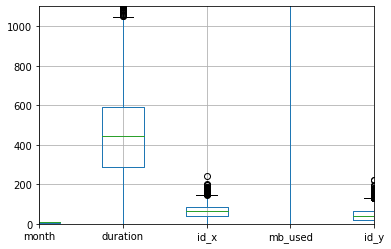

In [5]:
detail_tariff_info.boxplot()
plt.ylim(0, 1100) # для столбца mb_used используем значение 35000, найдено опытным путем
plt.xlim(3, 7) # нагляднее всего получается, когда используется пять графика
# перебираем все столбцы меняя значение xlim
plt.show()

detail_tariff_info = detail_tariff_info.query('duration < 1050') # обрезаем выбросы для столбцов, в которых считаем, что это необходимо для каждого тарифа
detail_tariff_info = detail_tariff_info.query('mb_used < 35000')

### Вывод

Столбцы, которые не требуют обработки выбросов: user_id, age, month, id_x (количество звонков), id_y (количество сообщений)

Для столбцов: duration, mb_used ограничили значения по верхнему усу, чтобы выпадающие значения не изменяли общий датасет.
Для столбца duration - верхний ус равен 1050
Для столбца mb_used - верхний ус равен 35000

In [6]:
detail_smart_info = detail_tariff_info.query('tariff == "smart"') # создаем отдельный датасет для тарифа "Смарт"
print('Количество пользователей тарифа "Смарт"', detail_smart_info['user_id'].count())
detail_ultra_info = detail_tariff_info.query('tariff == "ultra"') # создаем отдельный датасет для тарифа "Ультра"
print('Количество пользователей тарифа "Ультра"', detail_ultra_info['user_id'].count())
print('')


mean_calls_smart = detail_smart_info['duration'].mean() # вычисление средних значений для тарифа смарт
mean_messages_smart = detail_smart_info['id_y'].mean()
mean_internet_smart = detail_smart_info['mb_used'].mean()
print('Для тарифа "Смарт" среднее значение минут равно: {:.2f} сообщений: {:.2f} и интернета: {:.2f} Мб'.format(mean_calls_smart, mean_messages_smart, mean_internet_smart))


mean_calls_ultra = detail_ultra_info['duration'].mean()
mean_messages_ultra = detail_ultra_info['id_y'].mean()
mean_internet_ultra = detail_ultra_info['mb_used'].mean()
print('Для тарифа "Ультра" среднее значение минут равно: {:.2f} сообщений: {:.2f} и интернета: {:.2f} Мб'.format(mean_calls_ultra, mean_messages_ultra, mean_internet_ultra))
print('')

variance_calls_smart = np.var(detail_smart_info['duration'], ddof=1) # сичтаем именно дисперсию
standard_deviation_calls_smart = np.sqrt(variance_calls_smart)  # считаем стадартоное отклонение

variance_messages_smart = np.var(detail_smart_info['id_y'], ddof=1)
standard_deviation_messages_smart = np.sqrt(variance_messages_smart)

variance_internet_smart = np.var(detail_smart_info['mb_used'], ddof=1)
standard_deviation_internet_smart = np.sqrt(variance_internet_smart)
print('Для тарифа "Смарт" дисперсия и стандартное отклонение равны {:.2f}, {:.2f} для звонков, {:.2f}, {:.2f} для сообщений, {:.2f}, {:.2f} для интернета' \
      .format(variance_calls_smart, standard_deviation_calls_smart, variance_messages_smart, standard_deviation_messages_smart, variance_internet_smart, standard_deviation_internet_smart))


variance_calls_ultra = np.var(detail_ultra_info['duration'], ddof=1) 
standard_deviation_calls_ultra = np.sqrt(variance_calls_ultra)

variance_messages_ultra = np.var(detail_ultra_info['id_y'], ddof=1)
standard_deviation_messages_ultra = np.sqrt(variance_messages_ultra)

variance_internet_ultra = np.var(detail_ultra_info['mb_used'], ddof=1)
standard_deviation_internet_ultra = np.sqrt(variance_internet_ultra)
print('Для тарифа "Ультра" дисперсия и стандартное отклонение равны {:.2f}, {:.2f} для звонков, {:.2f}, {:.2f} для сообщений, {:.2f}, {:.2f} для интернета' \
      .format(variance_calls_ultra, standard_deviation_calls_ultra, variance_messages_ultra, standard_deviation_messages_ultra, variance_internet_ultra, standard_deviation_internet_ultra))


Количество пользователей тарифа "Смарт" 2213
Количество пользователей тарифа "Ультра" 822
Для тарифа "Смарт" среднее значение минут равно: 417.22 сообщений: 38.70 и интернета: 16173.00 Мб
Для тарифа "Ультра" среднее значение минут равно: 500.20 сообщений: 59.35 и интернета: 18037.51 Мб

Для тарифа "Смарт" дисперсия и стандартное отклонение равны 34685.94, 186.24 для звонков, 716.73, 26.77 для сообщений, 33399336.91, 5779.22 для интернета
Для тарифа "Ультра" дисперсия и стандартное отклонение равны 67025.67, 258.89 для звонков, 1862.47, 43.16 для сообщений, 72447040.20, 8511.58 для интернета


### Вывод

Посчитав описательные характеристики для выборок каждого тарифа можно с делать следующие выводы:
- Количество пользователей для каждого тарифа
    - пользователей тарифа "Смарт" на 232% больше, чем пользователей тарифа "Ультра" 2225 человек против 957
    
- Определить разброс в данных
- Тариф "Смарт"
    - звонки среднее 417, стд 186 - разброс допустимый (стд - стандартное отклонение)
    - сообщения среднее 39, стд 27 - разброс большой
    - интернет среднее 16173, стд 5779 - разброс допустимый
- Тариф "Ультра"
    - звонки среднее 500, стд 259 - разброс большой (стд - стандартное отклонение)
    - сообщения среднее 59, стд 43 - разброс большой
    - интернет среднее 18038, стд 8512 - разброс допустимый
- Использование услуг связи
    - пользователи тарифа "Ультра" в среднем на 120% чаше звонят, чем пользователи тарифа "Смарт", на 151% больше пишут сообщения и на 112% больше пользуются интернетом 


Максимальная длительность звонков в месяц по тарифу "Смарт" равно 1022.0
Гистрограмма для звонков по тарифу "Смарт"


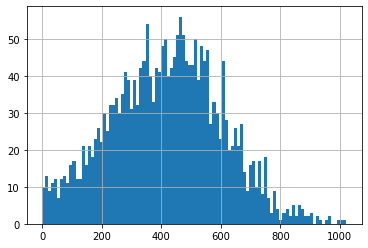


Максимальная длительность звонков в месяц по тарифу "Ультра" равно 1045.0
Гистрограмма для звонков по тарифу "Ультра"


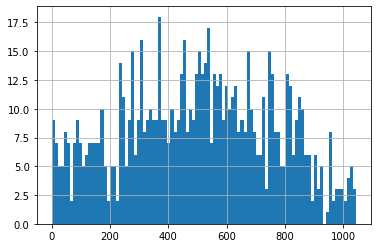

In [7]:
# Строим гистограммы для каждой характеристики тарифа
# Гистограммы для звонков
print('')
print('Максимальная длительность звонков в месяц по тарифу "Смарт" равно', detail_smart_info['duration'].max())
detail_smart_info['duration'].hist(bins=100) 
plt.title('Гистрограмма для звонков по тарифу "Смарт"')
plt.show()

print('')
print('Максимальная длительность звонков в месяц по тарифу "Ультра" равно', detail_ultra_info['duration'].max())
detail_ultra_info['duration'].hist(bins=100) 
plt.title('Гистрограмма для звонков по тарифу "Ультра"')
plt.show()


### Вывод

Гистограммы для звонков обоих тарифов внешне схожи, видно, что у тарифа «Ультра» стандартное отклонение больше, поэтому пиков намного больше, чем у тарифа «Смарт». Обе гистограммы не похожи на нормальное распределение.


Максимальное количество сообщений в месяц по тарифу "Смарт" равно 143.0
Гистрограмма для сообщений по тарифу "Смарт"


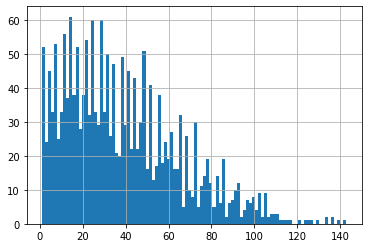


Максимальное количество сообщений в месяц по тарифу "Ультра" равно 224.0
Гистрограмма для сообщений по тарифу "Ультра"


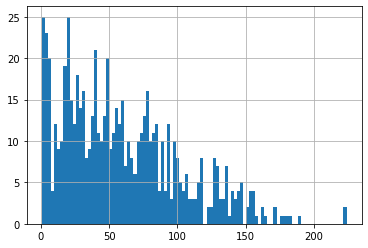

In [8]:
# Гистограммы для сообщений
print('')
print('Максимальное количество сообщений в месяц по тарифу "Смарт" равно', detail_smart_info['id_y'].max())
detail_smart_info['id_y'].hist(bins=100)
plt.title('Гистрограмма для сообщений по тарифу "Смарт"')
plt.show()

print('')
print('Максимальное количество сообщений в месяц по тарифу "Ультра" равно', detail_ultra_info['id_y'].max())
detail_ultra_info['id_y'].hist(bins=100)
plt.title('Гистрограмма для сообщений по тарифу "Ультра"')
plt.show()

### Вывод

Гистограммы для сообщений тоже внешне схожи, видно, что стандартное отклонение для обоих тарифов большое, много пиков. Обе гистограммы не похожи на нормальное распределение.


Максимальное количество используемых МБ интернета в месяц по тарифу "Смарт" равно 34962.0
Гистрограмма для используемых МБ интернета по тарифу "Смарт"


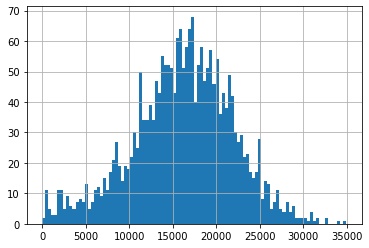


Максимальное количество используемых МБ интернета в месяц по тарифу "Ультра" равно 34924.0
Гистрограмма для используемых МБ интернета по тарифу "Ультра"


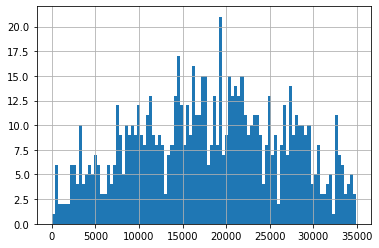

In [9]:
# Гистограммы для интернета
print('')
print('Максимальное количество используемых МБ интернета в месяц по тарифу "Смарт" равно', detail_smart_info['mb_used'].max())
detail_smart_info['mb_used'].hist(bins=100) 
plt.title('Гистрограмма для используемых МБ интернета по тарифу "Смарт"')
plt.show()

print('')
print('Максимальное количество используемых МБ интернета в месяц по тарифу "Ультра" равно', detail_ultra_info['mb_used'].max())
detail_ultra_info['mb_used'].hist(bins=100) 
plt.title('Гистрограмма для используемых МБ интернета по тарифу "Ультра"')
plt.show()

### Вывод

Гистограммы для интернета внешне схожи, стандартное отклонение в пределах нормы, хотя для тарифа «Ультра» приближается к отметке, где разброс будет являться большим. Гистограмма для тарифа «Смарт» похожа на нормальное распрделение.


Максимальное оплата за месяц по тарифу "Смарт" равна 4664.0
Гистрограмма для оплаты за месяц по тарифу "Смарт"


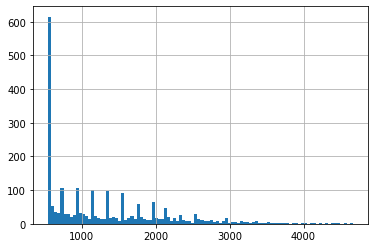


Максимальное оплата за месяц по тарифу "Ультра" равна 2700.0
Гистрограмма для оплаты за месяц по тарифу "Ультра"


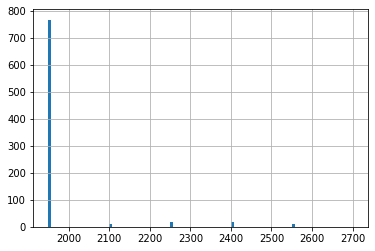

In [10]:
# Гистограммы для выручки по тарифам
print('')
print('Максимальное оплата за месяц по тарифу "Смарт" равна', detail_smart_info['month_payment'].max())
detail_smart_info['month_payment'].hist(bins=100) 
plt.title('Гистрограмма для оплаты за месяц по тарифу "Смарт"')
plt.show()

print('')
print('Максимальное оплата за месяц по тарифу "Ультра" равна', detail_ultra_info['month_payment'].max())
detail_ultra_info['month_payment'].hist(bins=100) 
plt.title('Гистрограмма для оплаты за месяц по тарифу "Ультра"')
plt.show()

### Вывод

По тарифу «Смарт» максимальный платеж на 141% больше, чем по тарифу «Ультра». Но большинство пользователей платят сумму до 2000 рублей. Гистограммы не похожи друг на друга, и обе не являются нормальным распределением.

### Шаг 4. Проверка гипотез <a id="step4"></a>  

Проверим распределение значений из столбца month_payment для двух тарифов на нормальность с помощью теста Шапиро-Уилка 

Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, выборка x которой известна, распределена по нормальному закону. Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным

In [11]:
smart_month_payment = detail_smart_info['month_payment']
ultra_month_payment = detail_ultra_info['month_payment']

# проверяем нормальность распределения тестом Шапиро
shapiro_stat_1, shapiro_p_1 = st.shapiro(smart_month_payment)
shapiro_stat_2, shapiro_p_2 = st.shapiro(ultra_month_payment)
alpha = .05

if shapiro_p_1 < alpha and shapiro_p_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
   

Отвергаем нулевую гипотезу


### Вывод

После проверки гипотезы стало понятно, что наша гипотеза отвергнута и как следствие оба распределения являются не нормальнымы.

Сформируем следующую гипотезу.

Наша нулевая гипотеза H0 - средняя выручки пользователей тарифов «Ультра» и «Смарт» одинаковы. Альтернативная гипотеза H1 - средняя выручки пользователей тарифов «Ультра» и «Смарт» различаются.

Так распредление не нормальное, то проверим гипотезу с помощью критерия Манна-Уитни

In [12]:
u_alpha = .01
u_results = st.mannwhitneyu(smart_month_payment, ultra_month_payment, alternative = 'two-sided') # используем критерий Манна Уитни для не нормального распределения
print('p-значение: {:.10f}'.format(u_results.pvalue))
if u_results.pvalue < u_alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.0000000000
Отвергаем нулевую гипотезу


### Вывод

После проверки гипотезы стало понятно, что наша гипотеза отвергнута и следовательно используем альтернативную гипотезу, а именно: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Проверим распределение значений из столбца month_payment для двух тарифов на нормальность с помощью теста Шапиро-Уилка в выборках Москвы и других регионов.

Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, выборка x которой известна, распределена по нормальному закону. Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным.

In [13]:
moscow_detail_tariff_info = detail_tariff_info.query('city == "Москва"')
moscow_month_payment = moscow_detail_tariff_info['month_payment']

another_detail_tariff_info  = detail_tariff_info.query('city != "Москва"')
another_month_payment = another_detail_tariff_info['month_payment']

# проверяем нормальность распределения тестом Шапиро
shapiro_stat_1, shapiro_p_1 = st.shapiro(moscow_month_payment)
shapiro_stat_2, shapiro_p_2 = st.shapiro(another_month_payment)
alpha = .05

if shapiro_p_1 < alpha and shapiro_p_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Отвергаем нулевую гипотезу


### Вывод

После проверки гипотезы стало понятно, что наша гипотеза отвергнута и как следствие оба распределения являются не нормальнымы.

Сформируем следующую гипотезу.

Наша нулевая гипотеза H0 - средняя выручка пользователей из Москвы и выручка пользователей из других регионов одинаковы. Альтернативная гипотеза H1 - средняя выручка пользователей из Москвы и выручка пользователей из других регионов различны.


Так распредление не нормальное, то проверим гипотезу с помощью критерия Манна-Уитни.

In [14]:
u_alpha = .01
u_results = st.mannwhitneyu(moscow_month_payment, another_month_payment, alternative = 'two-sided') # используем критерий Манна Уитни для не нормального распределения
print('p-значение: {:.10f}'.format(u_results.pvalue))
if u_results.pvalue < u_alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3469630352
Не получилось отвергнуть нулевую гипотезу


### Вывод

После проверки гипотезы стало понятно, что не получилось  отвергнуть нулевую гипотезу и следовательно используем нулевувю гипотезу, а именно: средняя выручка пользователей из Москвы и выручка пользователей из других регионов одинаковы.

### Шаг 5. Общий вывод <a id="step5"></a>  

In [15]:
print('Средняя стоимость оплаты тарифа "Смарт" составляет', detail_smart_info['month_payment'].mean())
print('Средняя стоимость оплаты тарифа "Ультра" составляет', detail_ultra_info['month_payment'].mean())
print('')
print('Выручка по тарифу "Смарт" равна', detail_smart_info['month_payment'].sum())
print('Выручка по тарифу "Смарт" равна', detail_ultra_info['month_payment'].sum())
print('')
all_smart = detail_smart_info['user_id'].count() # всего полльзователей тарифа "Смарт"
pay_min = detail_smart_info[detail_smart_info['month_payment'] <= 1950]['user_id'].count()
smart_pay_min = pay_min/all_smart*100
print('Количество пользователей тарифа "Смарт" с месечной оплатой ниже 1950 (мес. оплата тарифа "Ультра") равно {:.1f} %'.format(smart_pay_min))

all_ultra = detail_ultra_info['user_id'].count() # всего полльзователей тарифа "Ультра"
pay_min_ultra = detail_ultra_info[detail_ultra_info['month_payment'] > 1950]['user_id'].count()
ultra_pay_min = pay_min_ultra/all_ultra*100
print('Количество пользователей тарифа "Ультра" с месечной оплатой выше 1950 равно {:.1f} %'.format(ultra_pay_min))


Средняя стоимость оплаты тарифа "Смарт" составляет 1280.0741075463172
Средняя стоимость оплаты тарифа "Ультра" составляет 1976.094890510949

Выручка по тарифу "Смарт" равна 2832804.0
Выручка по тарифу "Смарт" равна 1624350.0

Количество пользователей тарифа "Смарт" с месечной оплатой ниже 1950 (мес. оплата тарифа "Ультра") равно 81.3 %
Количество пользователей тарифа "Ультра" с месечной оплатой выше 1950 равно 6.7 %


### Вывод

После анализа гипотез мы сделали вывод, что выручки отличаются.
Хотя максимальные значение по оплате тарифа "Смарт" на 141% больше, чем по тарифу «Ультра» 6770 против 4800, мы видим, что среднее значение у тарифа "Ультра" больше на 154% 1976 против 1280.

Выручка тарифа "Смарт" больше выручки от тарифа "Ультра" на 145% 2 881151 против 1 982100
Количество пользователей тарифа "Смарт" на 232% больше, чем у тарифа "Ультра" 2225 против 957

Пользователи тарифа "Ультра" больше используют услуги связи. В среднем на 120% чаше звонят, на 151% больше пишут сообщения и 
на 112% больше пользуются интернетом.

Большинство пользователей тарифа "Смарт" полностью используют возможности данного тарифа и использует дополнительные услуги, но даже с учетом дополнительных услуг месечная стоимость тарифа у 81% пользователей месечная оплата тарифа меньше, чем по тарифу "Ультра".

Для тарифа другая закономерность - всего 6.7% пользователей оплачивают дополнительные услуги. А большинство пользователей полностью не используют возможности тарифа, что очень выгодно для компании. Пользователь платит за это деньги, но не использует.

Окончательный вывод таков: даже с учетом того, что тариф "Смарт" приносит больше выручки компании, для компании выгодным тарифом является тариф "Ультра"
